# KNN

### Aufgabenstellung

**Aufgabe 5.1 (KNN). Gegeben seien die Trainingsdaten Tabelle 1 und der zu klassifizierende Punkt $ \mathbf{x} = (0, 0, 0)^T $.**

| $\mathbf{x}^{(i)}$ | $x_1^{(i)}$ | $x_2^{(i)}$ | $x_3^{(i)}$ | $y^{(i)}$ |
|----------------------|--------------|--------------|--------------|--------------|
| $\mathbf{x}^{(1)}$ | 0            | 3            | 0            | 0            |
| $\mathbf{x}^{(2)}$ | 2            | 0            | 0            | 0            |
| $\mathbf{x}^{(3)}$ | 0            | 1            | 3            | 0            |
| $\mathbf{x}^{(4)}$ | 0            | 1            | 2            | 1            |
| $\mathbf{x}^{(5)}$ | -1           | 0            | 1            | 1            |
| $\mathbf{x}^{(6)}$ | 1            | 1            | 1            | 0            |

1. Berechnen Sie die euklidische Distanz zwischen $ \mathbf{x} $ und jedem der sechs Trainingsdatenpunkte.
2. Was ist die Vorhersage $ y $ für $ \mathbf{x} $ wenn $ K = 1 $?
3. Was ist die Vorhersage $ y $ für $ \mathbf{x} $ wenn $ K = 3 $?
4. Wenn die Entscheidungsgrenze des optimalen Bayes Klassifikators sehr stark nichtlinear wäre, wäre ein hoher oder niedriger Wert für $ K $ angebracht?

### Lösungsansatz

#### 1. Berechnung der euklidischen Distanz

Die euklidische Distanz zwischen zwei Punkten $ \mathbf{x} = (x_1, x_2, x_3) $ und $ \mathbf{y} = (y_1, y_2, y_3) $ ist definiert als:

$$ d(\mathbf{x}, \mathbf{y}) = \sqrt{(x_1 - y_1)^2 + (x_2 - y_2)^2 + (x_3 - y_3)^2} $$

Für den Punkt $ \mathbf{x} = (0, 0, 0)^T $ berechnen wir die Distanzen zu jedem Trainingspunkt:

- $ d(\mathbf{x}, \mathbf{x}^{(1)}) = \sqrt{(0 - 0)^2 + (0 - 3)^2 + (0 - 0)^2} = \sqrt{0 + 9 + 0} = 3 $
- $ d(\mathbf{x}, \mathbf{x}^{(2)}) = \sqrt{(0 - 2)^2 + (0 - 0)^2 + (0 - 0)^2} = \sqrt{4 + 0 + 0} = 2 $
- $ d(\mathbf{x}, \mathbf{x}^{(3)}) = \sqrt{(0 - 0)^2 + (0 - 1)^2 + (0 - 3)^2} = \sqrt{0 + 1 + 9} = \sqrt{10} $
- $ d(\mathbf{x}, \mathbf{x}^{(4)}) = \sqrt{(0 - 0)^2 + (0 - 1)^2 + (0 - 2)^2} = \sqrt{0 + 1 + 4} = \sqrt{5} $
- $ d(\mathbf{x}, \mathbf{x}^{(5)}) = \sqrt{(0 + 1)^2 + (0 - 0)^2 + (0 - 1)^2} = \sqrt{1 + 0 + 1} = \sqrt{2} $
- $ d(\mathbf{x}, \mathbf{x}^{(6)}) = \sqrt{(0 - 1)^2 + (0 - 1)^2 + (0 - 1)^2} = \sqrt{1 + 1 + 1} = \sqrt{3} $


In [2]:
import numpy as np
import pandas as pd

# Gegebene Daten
train_data = np.array([
    [0, 3, 0, 0],
    [2, 0, 0, 0],
    [0, 1, 3, 0],
    [0, 1, 2, 1],
    [-1, 0, 1, 1],
    [1, 1, 1, 0]
])
x = np.array([0, 0, 0])

# Berechnung der euklidischen Distanzen
distances = np.linalg.norm(train_data[:, :-1] - x, axis=1)

# Erstellen eines DataFrames zur übersichtlichen Darstellung
df = pd.DataFrame(train_data, columns=['x1', 'x2', 'x3', 'y'])
df['Distance'] = distances
df = df[['x1', 'x2', 'x3', 'y', 'Distance']]

# Ausgabe des DataFrames
print(df)

   x1  x2  x3  y  Distance
0   0   3   0  0  3.000000
1   2   0   0  0  2.000000
2   0   1   3  0  3.162278
3   0   1   2  1  2.236068
4  -1   0   1  1  1.414214
5   1   1   1  0  1.732051


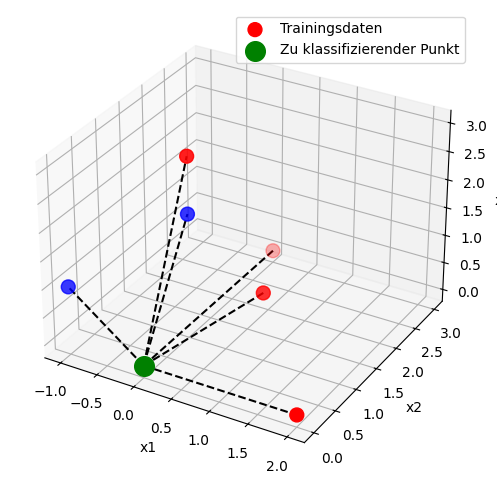

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Gegebene Daten
train_data = np.array([
    [0, 3, 0, 0],
    [2, 0, 0, 0],
    [0, 1, 3, 0],
    [0, 1, 2, 1],
    [-1, 0, 1, 1],
    [1, 1, 1, 0]
])
x = np.array([0, 0, 0])

# Berechnung der euklidischen Distanzen
distances = np.linalg.norm(train_data[:, :-1] - x, axis=1)

# Erstellen eines DataFrames zur übersichtlichen Darstellung
df = pd.DataFrame(train_data, columns=['x1', 'x2', 'x3', 'y'])
df['Distance'] = distances
df = df[['x1', 'x2', 'x3', 'y', 'Distance']]

# Visualisierung der Datenpunkte und Distanzen
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Trainingsdatenpunkte
colors = ['r' if label == 0 else 'b' for label in df['y']]
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors, s=100, label='Trainingsdaten')

# Zu klassifizierender Punkt
ax.scatter(x[0], x[1], x[2], c='g', s=200, label='Zu klassifizierender Punkt')

# Linien zur Darstellung der Distanzen
for i in range(len(df)):
    ax.plot([x[0], df['x1'][i]], [x[1], df['x2'][i]], [x[2], df['x3'][i]], 'k--')

# Beschriftung
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()

plt.show()

#### 2. Vorhersage $ y $ für $ \mathbf{x} $ wenn $ K = 1 $

Bei $ K = 1 $ wird die Klasse des nächstgelegenen Nachbarn genommen. Der nächstgelegene Punkt ist $ \mathbf{x}^{(2)} $ mit der Distanz 2 und der Klasse 0. Daher ist die Vorhersage:

$$ y = 0 $$


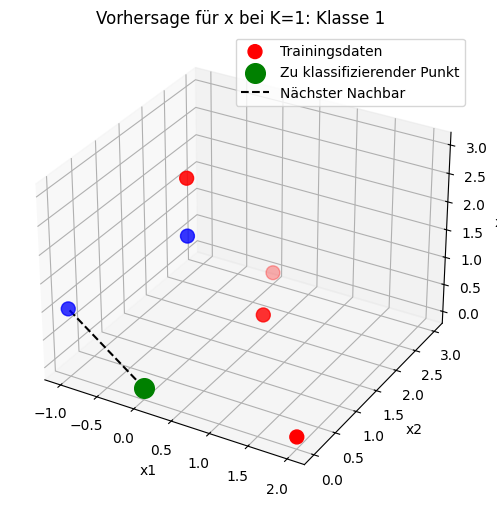

In [4]:


# Gegebene Daten
train_data = np.array([
    [0, 3, 0, 0],
    [2, 0, 0, 0],
    [0, 1, 3, 0],
    [0, 1, 2, 1],
    [-1, 0, 1, 1],
    [1, 1, 1, 0]
])
x = np.array([0, 0, 0])

# Berechnung der euklidischen Distanzen
distances = np.linalg.norm(train_data[:, :-1] - x, axis=1)

# Erstellen eines DataFrames zur übersichtlichen Darstellung
df = pd.DataFrame(train_data, columns=['x1', 'x2', 'x3', 'y'])
df['Distance'] = distances
df = df[['x1', 'x2', 'x3', 'y', 'Distance']]

# K = 1: Vorhersage basierend auf dem nächsten Nachbarn
nearest_neighbor_index = np.argmin(distances)
predicted_class = df.loc[nearest_neighbor_index, 'y']

# Visualisierung der Datenpunkte und Distanzen
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Trainingsdatenpunkte
colors = ['r' if label == 0 else 'b' for label in df['y']]
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors, s=100, label='Trainingsdaten')

# Zu klassifizierender Punkt
ax.scatter(x[0], x[1], x[2], c='g', s=200, label='Zu klassifizierender Punkt')

# Linie zur Darstellung der Distanz zum nächsten Nachbarn
nearest_point = train_data[nearest_neighbor_index, :-1]
ax.plot([x[0], nearest_point[0]], [x[1], nearest_point[1]], [x[2], nearest_point[2]], 'k--', label='Nächster Nachbar')

# Beschriftung
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()

plt.title(f'Vorhersage für x bei K=1: Klasse {int(predicted_class)}')
plt.show()

#### 3. Vorhersage $ y $ für $ \mathbf{x} $ wenn $ K = 3 $

Bei $ K = 3 $ werden die Klassen der drei nächstgelegenen Nachbarn betrachtet. Die drei nächstgelegenen Punkte sind $ \mathbf{x}^{(2)} $, $ \mathbf{x}^{(5)} $ und $ \mathbf{x}^{(6)} $. Ihre Klassen sind:

- $ \mathbf{x}^{(2)} $: Klasse 0
- $ \mathbf{x}^{(5)} $: Klasse 1
- $ \mathbf{x}^{(6)} $: Klasse 0

Die Mehrheit der Klassen (2 von 3) ist Klasse 0. Daher ist die Vorhersage:

$$ y = 0 $$

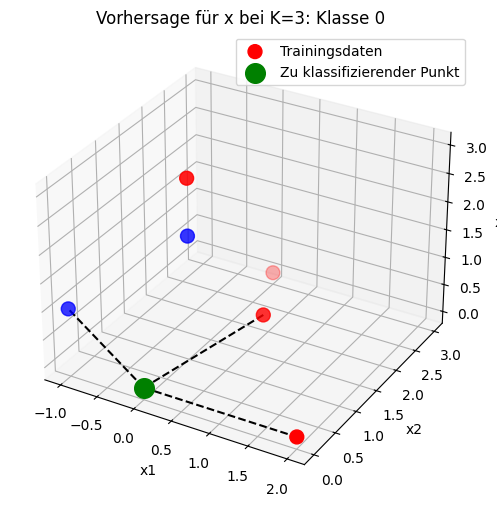

In [5]:


# Gegebene Daten
train_data = np.array([
    [0, 3, 0, 0],
    [2, 0, 0, 0],
    [0, 1, 3, 0],
    [0, 1, 2, 1],
    [-1, 0, 1, 1],
    [1, 1, 1, 0]
])
x = np.array([0, 0, 0])

# Berechnung der euklidischen Distanzen
distances = np.linalg.norm(train_data[:, :-1] - x, axis=1)

# Erstellen eines DataFrames zur übersichtlichen Darstellung
df = pd.DataFrame(train_data, columns=['x1', 'x2', 'x3', 'y'])
df['Distance'] = distances
df = df[['x1', 'x2', 'x3', 'y', 'Distance']]

# K = 3: Vorhersage basierend auf den 3 nächsten Nachbarn
k = 3
nearest_neighbors_indices = np.argsort(distances)[:k]
nearest_neighbors = df.iloc[nearest_neighbors_indices]
predicted_class = nearest_neighbors['y'].mode()[0]  # Mehrheit der Klassen

# Visualisierung der Datenpunkte und Distanzen
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Trainingsdatenpunkte
colors = ['r' if label == 0 else 'b' for label in df['y']]
ax.scatter(df['x1'], df['x2'], df['x3'], c=colors, s=100, label='Trainingsdaten')

# Zu klassifizierender Punkt
ax.scatter(x[0], x[1], x[2], c='g', s=200, label='Zu klassifizierender Punkt')

# Linien zur Darstellung der Distanzen zu den nächsten Nachbarn
for i in nearest_neighbors_indices:
    nearest_point = train_data[i, :-1]
    ax.plot([x[0], nearest_point[0]], [x[1], nearest_point[1]], [x[2], nearest_point[2]], 'k--')

# Beschriftung
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.legend()

plt.title(f'Vorhersage für x bei K=3: Klasse {int(predicted_class)}')
plt.show()

#### 4. Wahl von $ K $ bei nichtlinearer Entscheidungsgrenze

Wenn die Entscheidungsgrenze des optimalen Bayes Klassifikators sehr stark nichtlinear ist, wäre ein niedriger Wert für $ K $ angebracht. Ein niedriger $ K $-Wert erlaubt es dem Modell, flexibler und genauer auf lokale Variationen zu reagieren, was bei stark nichtlinearen Grenzen von Vorteil ist.

Eine nichtlineare Entscheidungsgrenze beim optimalen Bayes-Klassifikator ist eine Trennlinie oder Trennfläche, die die Merkmalsräume unterschiedlicher Klassen in einem Klassifikationsproblem trennt und keine gerade Linie oder Ebene ist. Im Gegensatz zu linearen Entscheidungsgrenzen, die durch einfache lineare Gleichungen beschrieben werden können, sind nichtlineare Entscheidungsgrenzen komplexer und können durch geschwungene oder unregelmäßige Formen dargestellt werden.

### Beispiel: Lineare vs. Nichtlineare Entscheidungsgrenzen

1. **Lineare Entscheidungsgrenze**:
   - Kann durch eine lineare Gleichung der Form $ w_1 x_1 + w_2 x_2 + b = 0$ dargestellt werden.
   - Trennt die Merkmalsräume in einer Weise, dass alle Punkte auf einer Seite der Linie zu einer Klasse gehören und alle Punkte auf der anderen Seite zu einer anderen Klasse.
   - Beispiele für Klassifikatoren mit linearen Entscheidungsgrenzen sind der Perzeptron, lineare Support Vector Machines (SVMs) und lineare Diskriminanzanalyse (LDA).

2. **Nichtlineare Entscheidungsgrenze**:
   - Kann durch eine komplexere Funktion beschrieben werden, die nicht linear ist, wie z.B. Polynome höheren Grades, exponentielle Funktionen oder andere nichtlineare Transformationen.
   - Trennt die Merkmalsräume auf eine Weise, die besser an die tatsächliche Verteilung der Daten angepasst ist, besonders wenn die Datenpunkte in komplexeren Mustern verteilt sind.
   - Beispiele für Klassifikatoren mit nichtlinearen Entscheidungsgrenzen sind k-Nearest Neighbors (KNN), Kernel-SVMs und Entscheidungsbäume.

### Der Optimale Bayes-Klassifikator

Der optimale Bayes-Klassifikator verwendet die bedingten Wahrscheinlichkeitsverteilungen der Klassen, um die Klasse eines neuen Datenpunkts vorherzusagen. Er wählt die Klasse mit der höchsten posterioren Wahrscheinlichkeit $ P(C_k | x) $. Die Entscheidungsgrenze wird durch die Gleichung beschrieben:

$$ P(C_1 | x) = P(C_2 | x) $$

Wo $ C_1 $ und $ C_2 $ zwei Klassen sind. Wenn die bedingten Wahrscheinlichkeitsverteilungen komplex sind, kann die resultierende Entscheidungsgrenze nichtlinear sein.

### Beispiel für Nichtlineare Entscheidungsgrenzen

Ein einfaches Beispiel für nichtlineare Entscheidungsgrenzen kann durch die Verteilung von Datenpunkten in Form von Kreisen oder Ellipsen illustriert werden:

- **Kreisförmige Verteilung**:
  - Datenpunkte zweier Klassen sind in konzentrischen Kreisen um einen gemeinsamen Mittelpunkt verteilt.
  - Die lineare Trennlinie kann die Datenpunkte nicht gut trennen, aber eine nichtlineare Entscheidungsgrenze in Form eines Kreises kann dies tun.



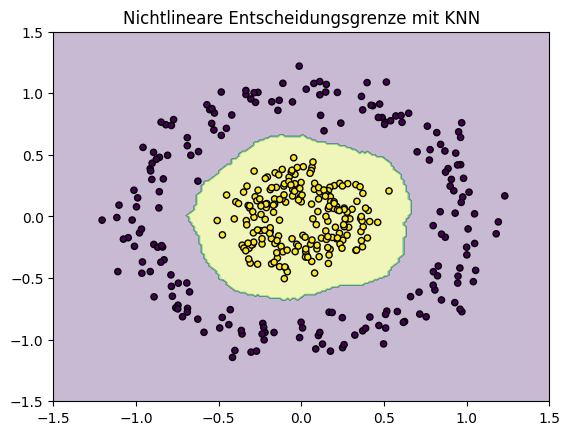

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier

# Erzeugen eines Datensatzes mit kreisförmiger Verteilung
X, y = make_circles(n_samples=400, factor=.3, noise=.1)

# KNN-Klassifikator
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Plot
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 200), np.linspace(-1.5, 1.5, 200))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("Nichtlineare Entscheidungsgrenze mit KNN")
plt.show()

# Rastersuche und Kreuzvalidierung

In dieser Aufgabe lernen Sie den Iris Datensatz kennen, trainieren eine Reihe von KNN-Modellen mit variierender Nachbarschaftsgröße und setzen dabei Kreuzvalidierung ein.

#### 1. Laden Sie den Iris-Datensatz mit Hilfe sklearn.datasets.load_iris in die Variablen X (Features) und y (Zielgröße, Target).

In [8]:
from sklearn.datasets import load_iris
# Laden des Iris-Datensatzes
iris = load_iris()
X = iris.data
y = iris.target

# Umwandlung in DataFrame für bessere Übersicht
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0




#### 2. Was sind die einzelnen Features und was sind die Target-Klassen?

##### Erklärung:
- **Features**: Die einzelnen Merkmale (Features) des Iris-Datensatzes sind:
  - Sepal length (cm)
  - Sepal width (cm)
  - Petal length (cm)
  - Petal width (cm)

- **Target-Klassen**: Die Zielklassen (Target) sind die verschiedenen Iris-Blumenarten:
  - 0: Iris-Setosa
  - 1: Iris-Versicolour
  - 2: Iris-Virginica




#### 3. Schreiben Sie eine Schleife, in welcher Sie über die Werte für K von 1 bis 100 iterieren (Rastersuche). Im Schleifenkörper erstellen Sie jeweils ein sklearn.neighbors.KNeighborsClassifier Modell und berechnen mit Hilfe von sklearn.model_selection.cross_val_score die Genauigkeit mit Hilfe von 5-facher Kreuzvalidierung. Nehmen Sie hierfür den Mittelwert. Speichern Sie diese Werte für jede Belegung von K in eine Liste.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Liste zur Speicherung der Genauigkeitswerte
accuracy_scores = []

# Iteration über verschiedene Werte von K
for k in range(1, 101):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    accuracy_scores.append(scores.mean())

# Umwandlung in einen DataFrame zur besseren Übersicht
accuracy_df = pd.DataFrame({'K': range(1, 101), 'Accuracy': accuracy_scores})
accuracy_df.head()

,K,Accuracy
0,1,0.960000
1,2,0.946667
2,3,0.966667
3,4,0.973333
4,5,0.973333


#### 4. Plotten Sie mit Hilfe von matplotlib die scores auf die K-Werte.


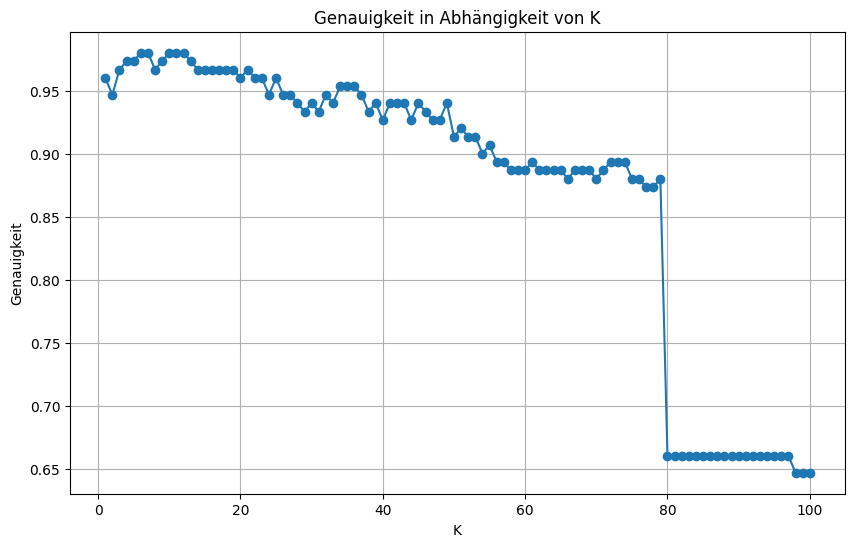

In [10]:
import matplotlib.pyplot as plt

# Plotten der Genauigkeitswerte
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), accuracy_scores, marker='o')
plt.title('Genauigkeit in Abhängigkeit von K')
plt.xlabel('K')
plt.ylabel('Genauigkeit')
plt.grid(True)
plt.show()

#### 5. Für welche(n) Wert(e) von K ist die Genauigkeit maximal?


In [11]:
max_accuracy = max(accuracy_scores)
optimal_k = accuracy_df[accuracy_df['Accuracy'] == max_accuracy]['K'].values
optimal_k, max_accuracy

(array([ 6,  7, 10, 11, 12]), 0.9800000000000001)

### 6. Interpretieren Sie den Plot hinsichtlich möglicher Über- und Unteranpassung.

#### Erklärung:
- **Überanpassung (Overfitting)**: Bei sehr kleinen Werten von \( K \) (z.B. \( K = 1 \)) passt das Modell die Trainingsdaten sehr eng an, was zu hoher Varianz und schlechter Generalisierbarkeit auf neue Daten führt.
- **Unteranpassung (Underfitting)**: Bei sehr großen Werten von \( K \) (z.B. \( K = 100 \)) ist das Modell zu einfach und kann die zugrunde liegenden Muster in den Daten nicht gut erfassen, was zu hoher Verzerrung führt.

Ein optimaler Wert für \( K \) balanciert diese beiden Extreme aus und führt zu einer guten Generalisierbarkeit auf neuen Daten.

#### Interpretation des Plots:
- **Niedrige \( K \)-Werte**: Der Plot zeigt bei sehr niedrigen \( K \)-Werten hohe Genauigkeiten auf den Trainingsdaten, die jedoch auf den Testdaten deutlich schlechter sein können, was auf Überanpassung hinweist.
- **Hohe \( K \)-Werte**: Der Plot zeigt bei sehr hohen \( K \)-Werten abnehmende Genauigkeiten, da das Modell zu stark vereinfacht und somit wichtige Muster in den Daten vernachlässigt werden.
- **Optimaler \( K \)-Wert**: Der beste Wert für \( K \) ist derjenige, bei dem die Genauigkeit auf den Testdaten maximiert wird, während gleichzeitig Über- und Unteranpassung vermieden werden. Dieser Punkt stellt den optimalen Kompromiss zwischen Bias und Varianz dar.